In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

# Created by Diana Janik and Jan Markiewicz

In [2]:
import torch 
import torchvision


## Zadanie 1

Wytrenuj sieć na danych  z pliku `reg_data_noise.npy`. 

In [3]:
data = np.load('reg_data_noise.npy')

In [4]:
xs = data[:,0]
ys = data[:,1]

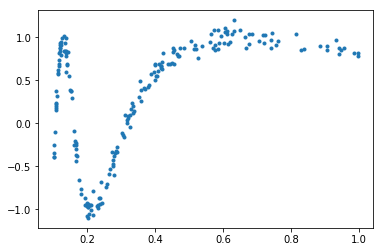

In [5]:
plt.plot(xs,ys,'.');

In [6]:
model = torch.nn.Sequential(torch.nn.Linear(1,5),
#                     torch.nn.Dropout(0.2),
                    torch.nn.ReLU(), 
#                     torch.nn.Linear(8,64),
#                     torch.nn.ReLU(),
#                     torch.nn.Linear(64,8),
#                     torch.nn.ReLU(),
                    torch.nn.Linear(5,5), 
#                     torch.nn.Dropout(0.1),
                    torch.nn.ReLU(), 
                    torch.nn.Linear(5,1))

In [7]:
t_xs = torch.from_numpy(xs).view(-1,1)
t_ys = torch.from_numpy(ys).view(-1,1)

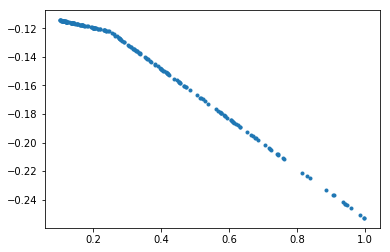

In [8]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

In [9]:
dataset = torch.utils.data.TensorDataset(t_xs, t_ys)
(train_set, valid_set) = torch.utils.data.random_split(dataset,(160,40))

In [10]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=len(train_set))

In [11]:
optimizer = torch.optim.SGD(model.parameters(),lr =0.01)

In [12]:
loss_func = torch.nn.MSELoss()

epoch 0 0.697937 0.712122 


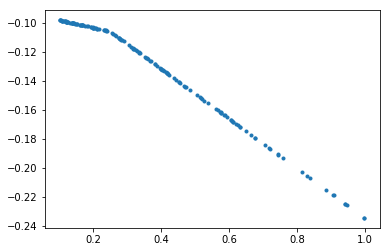

epoch 1000 0.400025 0.429826 


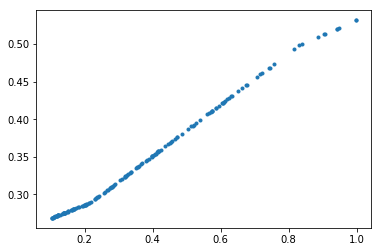

epoch 2000 0.278836 0.361967 


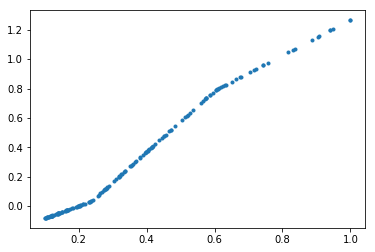

epoch 3000 0.275900 0.365637 


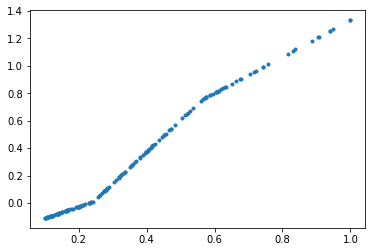

epoch 4000 0.273630 0.363113 


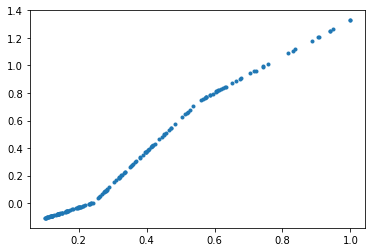

epoch 5000 0.270562 0.359562 


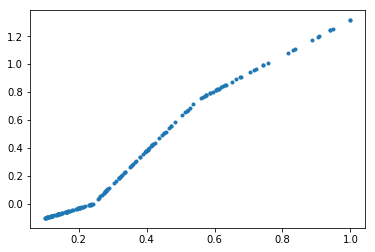

epoch 6000 0.266279 0.355070 


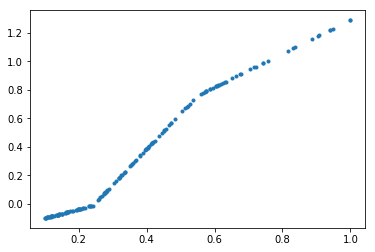

epoch 7000 0.260292 0.348341 


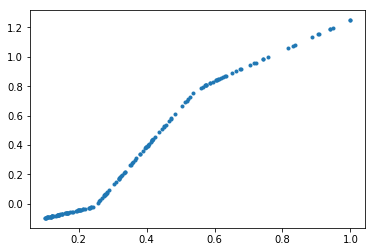

In [ ]:
%%time
err_train=[]
err_valid=[]
for epoch in range(10000):    
    for datum in train_loader:
        optimizer.zero_grad()
        (features,target) = datum
        pred = model(features)
        loss = loss_func(pred, target)
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        vpred  = model(valid_set[:][0])
        vloss  = loss_func(vpred,valid_set[:][1])
        err_valid.append(vloss)
        pred  = model(train_set[:][0])
        loss  = loss_func(pred,train_set[:][1])
        err_train.append(loss)
    if epoch%1000 == 0:
        print("epoch %d %f %f " % (epoch, loss, vloss)) 
#         print(pred[:])
#         print(train_set[:][0])
        pltX = [float(x) for [x] in train_set[:][0]]
        pltY = [float(x) for [x] in pred[:]]
#         print(pltX)
#         print(pltY)
        plt.plot(pltX, pltY,'.')
        plt.show()

In [ ]:
t_out = model(t_xs)

plt.plot(xs, t_out.data.view(-1).numpy(),'.')

In [ ]:
plt.plot(err_train, '.', label='train')
plt.plot(err_valid, '.', label='valid');
plt.legend()

In [ ]:
t_out_train = model(train_set[:][0])
plt.plot(train_set[:][0].data.numpy(), t_out_train.data.view(-1).numpy(),'.')
t_out_valid = model(valid_set[:][0])
plt.plot(valid_set[:][0].data.numpy(), t_out_valid.data.view(-1).numpy(),'.')

In [ ]:
torch.save(model, "model.pt")